# Voting Influence and Concentration Analysis (VICA)

## Process Data

In [1]:
import pandas as pd
from data_processor import process_data

# # Process from raw data (if raw data has been updated)
# df_token_house_top_200, df_citizen_house, df_summary = process_data()
# df_token_house_top_200.to_csv('../data/token_house.csv')
# df_citizen_house.to_csv('../data/citizen_house.csv')
# df_summary.to_csv('../data/summary.csv')

# Use processed data from 2024-07-01
df_token_house_top_200 = pd.read_csv('../data/token_house.csv')
df_citizen_house = pd.read_csv('../data/citizen_house.csv')
df_summary = pd.read_csv('../data/summary.csv')

## Run VICA

In [ ]:
from vica import *

# further process data and convert to R
(prop_token_filter, prop_cit_filter,prop_token_filter_add, prop_cit_filter_add) = process_data_and_convert_to_r(df_token_house_top_200, df_citizen_house, df_summary)
# run VICA
results_dict = run_vica_all(prop_token_filter, prop_cit_filter,prop_token_filter_add, prop_cit_filter_add)
# Get states
df_stats = run_stats(results_dict)


## Save Results and Upload to Dune

In [6]:
results_output_file_path = '../results/results.csv'

df_stats.to_csv(results_output_file_path,mode='a',header=not pd.io.common.file_exists(results_output_file_path),index=False)


In [28]:
from dune_uploader import upload_data

upload_data(results_output_file_path)

## Explore and Expirement

In [7]:
df_stats

,Statistic,Value,Entity,Scenario_Type,Regression_Type,Date
1,Variance,666.156773,token_house,factual,logit_effect,2024-07-01
2,Skewness,-0.199813,token_house,factual,logit_effect,2024-07-01
3,Kurtosis,1.544448,token_house,factual,logit_effect,2024-07-01
4,Gini Coefficient,0.635614,token_house,factual,logit_effect,2024-07-01
5,Herfindahl-Hirschman Index,0.007305,token_house,factual,logit_effect,2024-07-01
...,...,...,...,...,...,...
3,Kurtosis,1.504528,both_houses,counterfactual,logit_effect,2024-07-01
4,Gini Coefficient,-0.436947,both_houses,counterfactual,logit_effect,2024-07-01
5,Herfindahl-Hirschman Index,0.066667,both_houses,counterfactual,logit_effect,2024-07-01
6,Entropy,-0.000000,both_houses,counterfactual,logit_effect,2024-07-01


In [19]:
regression_types

array(['logit_effect', 'adjusted_logit_effect'], dtype=object)

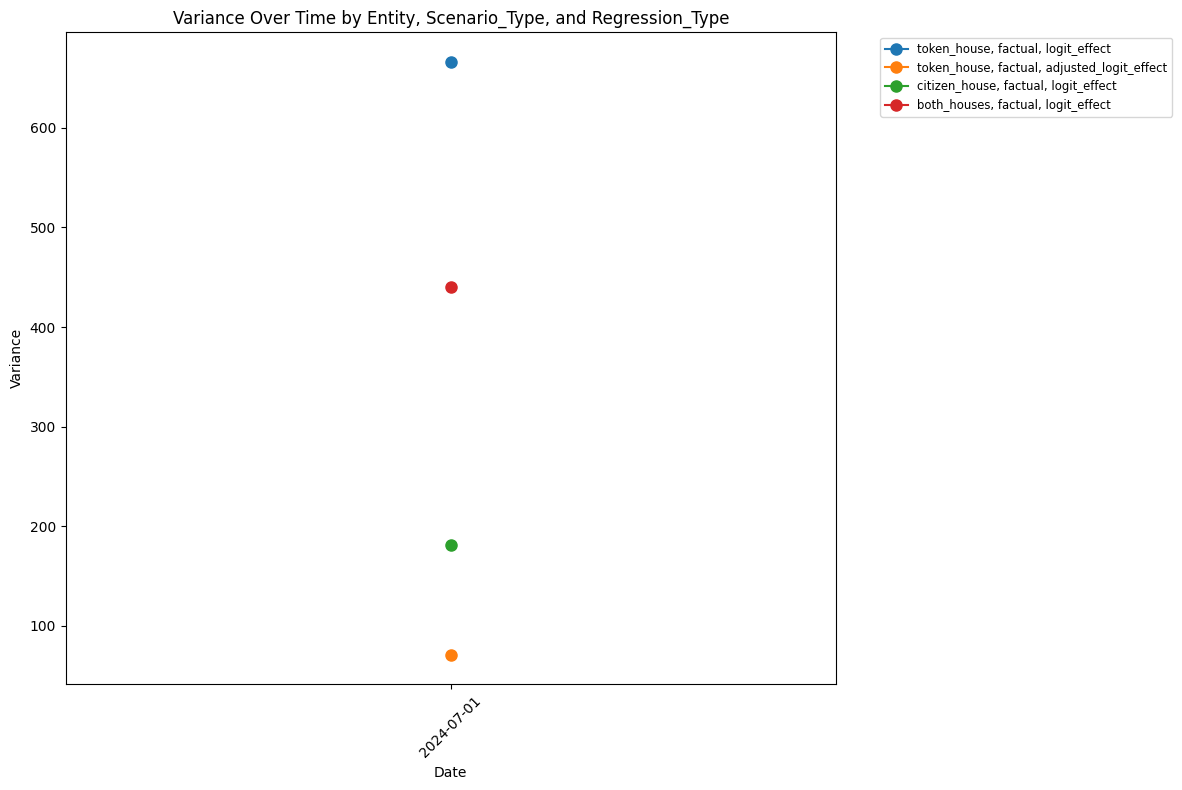

In [27]:
import numpy as np
import matplotlib.pyplot as plt
num_points=1
# Simulate additional data points for various entities, scenario types, and regression types
entities = ['token_house', 'citizen_house', 'both_houses']
scenario_types = ['factual']
regression_types = ['logit_effect', 'adjusted_logit_effect']
dates = df_stats.Date.unique()

# Convert to a DataFrame
df_simulated =  df_stats

# Plot the variance over time for each combination of Entity, Scenario_Type, and Regression_Type
plt.figure(figsize=(12, 8))

# Plotting for each unique combination
for entity in entities:
    for scenario in scenario_types:
        for regression in regression_types:
            subset = df_simulated[(df_simulated['Entity'] == entity) &
                                  (df_simulated['Scenario_Type'] == scenario) &
                                  (df_simulated['Regression_Type'] == regression) &
                                  (df_simulated['Statistic'] == 'Variance')]
            if not subset['Value'].empty:
                if subset['Value'].values[0]!=0:
                    plt.plot(subset['Date'], subset['Value'],  marker='o', markersize=8, label=f'{entity}, {scenario}, {regression}')

# Customize the plot
plt.title('Variance Over Time by Entity, Scenario_Type, and Regression_Type')
plt.xlabel('Date')
plt.ylabel('Variance')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
plt.tight_layout()
plt.show()


In [2]:
# 计算相似性矩阵

import random
import numpy as np
M_token_tranc_t=Similar_matriix(prop_token_filter_add_t,3)
M_cit_tranc_t=Similar_matriix(prop_cit_filter_add_t,3)
# # Save the array
# np.save('M_token_tranc_t.npy', M_token_tranc_t)
# np.save('M_cit_tranc_t.npy', M_cit_tranc_t)

# # Load the array back into memory
# M_token_tranc_t = np.load('M_token_tranc_t.npy')
# M_cit_tranc_t = np.load('M_cit_tranc_t.npy')



In [ ]:
# 进行网络聚类
random.seed(1)
community_token_t = Community_detection(M_token_tranc_t,0.1,3)
community_cit_t = Community_detection(M_cit_tranc_t,0.1,3)



In [5]:
print(community_cit_t)

$community
IGRAPH clustering multi level, groups: 1, mod: 0.11
+ groups:
  $`1`
   [1]  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
  [25] 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44
  

$membership
 [1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[39] 1 1 1 1 1 1




In [ ]:

community_token_t[1]
#对应membership，即分组的信息


In [ ]:
prop_token_filter_add_t[2] #对应unique(address)即token house中的address

In [8]:
# 把分组信息赋予Louvain_member 
Louvain_member_token_t = community_token_t[1]

Louvain_member_cit_t = community_cit_t[1]

#Group_token_t =data.frame(address = unique(prop_token_filter_add_t[2]),group = Louvain_member_token_t)

In [9]:
#逻辑回归
import matplotlib.pyplot as plt
log_eff_token_t=Logistic_reg_single(prop_token_filter_add_t,Louvain_member_token_t,False)
ad_log_eff_token_t=Logistic_reg_single(prop_token_filter_add_t,Louvain_member_token_t,True)


log_eff_cit_t=Logistic_reg_single(prop_cit_filter_add_t,Louvain_member_cit_t,False)
ad_log_eff_cit_t=Logistic_reg_single(prop_cit_filter_add_t,Louvain_member_cit_t,True)


In [10]:
import pandas as pd
import numpy as np
ad_log_eff_token_t = ad_log_eff_token_t[~np.isnan(ad_log_eff_token_t)]
np.var(ad_log_eff_token_t)



np.float64(70.77467641365277)

In [99]:
#print(ad_log_eff_token_t)

In [ ]:
log_eff_cit_t

In [12]:
log_eff_cit_t = log_eff_cit_t[~np.isnan(log_eff_cit_t)]
np.var(log_eff_cit_t)

np.float64(176.12395262839127)

In [13]:
log_eff_both_t=Logistic_reg_multiple(prop_cit_filter_add_t,prop_token_filter_add_t)

In [14]:
log_eff_both_t = log_eff_both_t[~np.isnan(log_eff_both_t)]
np.var(log_eff_both_t)

np.float64(410.59026003486366)

In [15]:
#反事实逻辑回归
log_eff_token_rev_t = CT_Logistic_reg_single(prop_token_filter_t,Louvain_member_token_t,False)

ad_log_eff_token_rev_t = CT_Logistic_reg_single(prop_token_filter_t,Louvain_member_token_t,True)


In [23]:
log_eff_token_rev_t = log_eff_token_rev_t[~np.isnan(log_eff_token_rev_t)]
np.var(log_eff_token_rev_t)

np.float64(671.0077449935421)

In [16]:
ad_log_eff_token_rev_t = ad_log_eff_token_rev_t[~np.isnan(ad_log_eff_token_rev_t)]
np.var(ad_log_eff_token_rev_t)

np.float64(67.80281136127964)

In [17]:
log_eff_cit_rev_t = CT_Logistic_reg_single(prop_cit_filter_t,Louvain_member_cit_t,False)

ad_log_eff_cit_rev_t = CT_Logistic_reg_single(prop_cit_filter_t,Louvain_member_cit_t,True)


In [18]:
log_eff_both_rev_t = CT_Logistic_reg_multiple(prop_token_filter_t,prop_cit_filter_t)